In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("C:/NoterDTU/6_semester/Social_data/website_2/merged_data.csv")


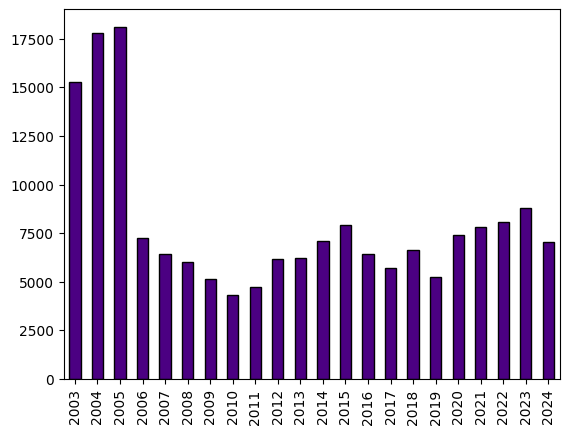

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("C:/NoterDTU/6_semester/Social_data/website_2/merged_data.csv")
crimes = data[['Category', 'Year']]
crimes = crimes[(crimes['Category']=='VEHICLE THEFT') & (crimes['Year']!=2025)  ]
crime_counts = crimes["Year"].value_counts().sort_index()
crime_counts.plot(kind="bar",color="indigo",edgecolor="black")
plt.show()


In [ ]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

Text(0.5, 1.0, 'Number of crimes per year (2003-2025)')

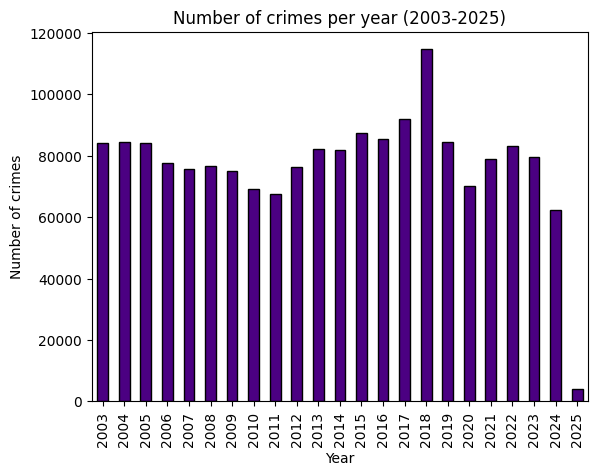

In [34]:
data["Year"].value_counts().sort_index().plot(kind="bar",color="indigo",edgecolor="black")
plt.ylabel("Number of crimes")
plt.xlabel("Year")
plt.title("Number of crimes per year (2003-2025)")

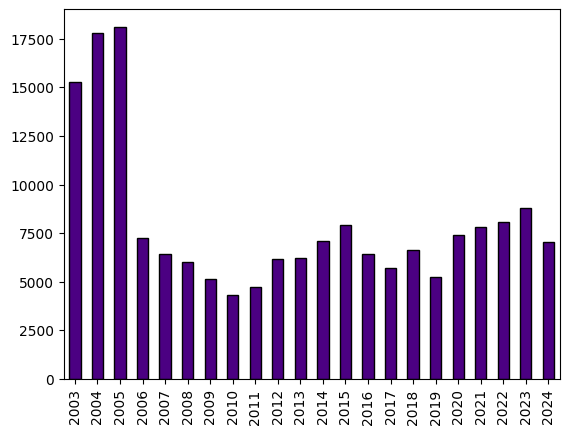

In [38]:
crimes = data[['Category', 'Year']]
crimes = crimes[(crimes['Category']=='VEHICLE THEFT') & (crimes['Year']!=2025)  ]
crime_counts = crimes["Year"].value_counts().sort_index()
crime_counts.plot(kind="bar",color="indigo",edgecolor="black")
plt.show()


In [32]:
import pandas as pd
import folium
from folium.plugins import HeatMapWithTime
from IPython.display import display

# Load data
df = pd.read_csv("C:/NoterDTU/6_semester/Social_data/website_2/merged_data.csv")

# Filter for vehicle thefts between 2003-2007
df_filtered = df[(df['Category'] == 'VEHICLE THEFT') & 
                 (df['Year'].between(2003, 2024))].copy()

# Check if filtered data is empty
if df_filtered.empty:
    print("Warning: No data after filtering!")
else:
    print(f"Found {len(df_filtered)} records after filtering")

# Extract relevant columns and drop NA
df_filtered = df_filtered[['Latitude', 'Longitude', 'Month', 'Year']].dropna()

# Check for valid coordinates
valid_coords = df_filtered[
    (df_filtered['Latitude'].between(-90, 90)) & 
    (df_filtered['Longitude'].between(-180, 180))
]
if len(valid_coords) < len(df_filtered):
    print(f"Warning: {len(df_filtered) - len(valid_coords)} records have invalid coordinates")

# Define month mapping and order
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, 
    "May": 5, "June": 6, "July": 7, "August": 8, 
    "September": 9, "October": 10, "November": 11, "December": 12
}
month_names = list(month_mapping.keys())

# Create numerical month column
df_filtered['MonthNum'] = df_filtered['Month'].map(month_mapping)

# Sort by year and month
df_filtered = df_filtered.sort_values(['Year', 'MonthNum'])

# Prepare heat data and time index
heat_data = []
time_index = []

for year in range(2003, 2025):
    for month_num in range(1, 13):
        month_data = df_filtered[
            (df_filtered['Year'] == year) & 
            (df_filtered['MonthNum'] == month_num)
        ]
        coords = month_data[['Latitude', 'Longitude']].values.tolist()
        heat_data.append(coords)
        time_index.append(f"{month_names[month_num-1]} {year}")
        
        # Print count for debugging
        print(f"{month_names[month_num-1]} {year}: {len(coords)} points")

# Only create map if we have data
if any(len(data) > 0 for data in heat_data):
    # Create base map
    base_map = folium.Map(location=[37.77919, -122.41914], zoom_start=12.5)
    
    # Add heatmap with time
    HeatMapWithTime(
        heat_data,
        index=time_index,  # Time labels showing month and year
        auto_play=True,
        max_opacity=0.5,
        radius=13,
        min_opacity=0.1,
        gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 0.8: 'red'},
        display_index=True,
        use_local_extrema=False, 
        name="Vehicle Thefts",
        blur=1
    ).add_to(base_map)
    
    # Add layer control
    folium.LayerControl().add_to(base_map)
    
    # Display map
    display(base_map)

Found 175849 records after filtering
January 2003: 1130 points
February 2003: 1085 points
March 2003: 1406 points
April 2003: 1440 points
May 2003: 1296 points
June 2003: 1219 points
July 2003: 1257 points
August 2003: 1401 points
September 2003: 1373 points
October 2003: 1302 points
November 2003: 1175 points
December 2003: 1192 points
January 2004: 1364 points
February 2004: 1315 points
March 2004: 1482 points
April 2004: 1507 points
May 2004: 1602 points
June 2004: 1439 points
July 2004: 1468 points
August 2004: 1532 points
September 2004: 1404 points
October 2004: 1532 points
November 2004: 1550 points
December 2004: 1621 points
January 2005: 1681 points
February 2005: 1362 points
March 2005: 1473 points
April 2005: 1586 points
May 2005: 1580 points
June 2005: 1385 points
July 2005: 1414 points
August 2005: 1404 points
September 2005: 1420 points
October 2005: 1766 points
November 2005: 1714 points
December 2005: 1318 points
January 2006: 604 points
February 2006: 567 points
March 

In [31]:
from bokeh.io import output_notebook, show
from bokeh.layouts import column
from bokeh.models import Select, Slope, Label, CustomJS, HoverTool
from bokeh.plotting import figure, ColumnDataSource
import numpy as np
import pandas as pd

# Configure Bokeh to load silently
output_notebook(hide_banner=True)

# Load and prepare your crime data
df = pd.read_csv("C:/NoterDTU/6_semester/Social_data/website_2/merged_data.csv")

# Define focus crimes
focuscrimes = {
    'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 
    'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'
}

# Filter and process data
df_focus = df[df['Category'].isin(focuscrimes)]
df_focus_grouped = df_focus.groupby(['Year', 'Month', 'Category']).size().reset_index(name='Crime_Count')
df_focus_grouped['Date'] = pd.to_datetime(df_focus_grouped['Month'] + ' ' + df_focus_grouped['Year'].astype(str), errors='coerce')
df_focus_grouped = df_focus_grouped.dropna()

# Extract month and year for hover tool
df_focus_grouped['Month_Year'] = df_focus_grouped['Date'].dt.strftime('%b %Y')

# Pivot the data
df_pivot = df_focus_grouped.pivot_table(index=['Date', 'Month_Year'], columns='Category', values='Crime_Count', fill_value=0)
df_pivot['Total Crimes'] = df_pivot.sum(axis=1)
df_pivot.reset_index(inplace=True)

# Prepare plotting data
numeric_cols = [col for col in df_pivot.columns if col not in ['Date', 'Month_Year']]
df_plot = df_pivot[numeric_cols]

# Set initial variables
x_init = numeric_cols[8]
y_init = numeric_cols[1]
x_data = df_plot[x_init].values
y_data = df_plot[y_init].values

# Calculate initial regression
n = len(x_data)
x_sum, y_sum, xy_sum, x2_sum, y2_sum = x_data.sum(), y_data.sum(), (x_data*y_data).sum(), (x_data**2).sum(), (y_data**2).sum()
slope_val = (n * xy_sum - x_sum * y_sum) / (n * x2_sum - x_sum * x_sum)
intercept = (y_sum - slope_val * x_sum) / n
r_value = (n * xy_sum - x_sum * y_sum) / np.sqrt((n * x2_sum - x_sum * x_sum) * (n * y2_sum - y_sum * y_sum))
r_squared = r_value ** 2

# Create ColumnDataSource with Month_Year for hover tool
source = ColumnDataSource(df_pivot)

# Create figure with initial axis labels
plot = figure(
    title="Crime Data Correlation Analysis", 
    x_axis_label="Number of incidents for X-axis crime type (month,year)",
    y_axis_label="Number of incidents for Y-axis crime type (month,year)",
    tools="pan,wheel_zoom,box_zoom,reset",
    width=750, 
    height=550,
    background_fill_color="#f5f5f5",
    toolbar_location="above"
)

# Format plot appearance
plot.title.text_font_size = '16pt'
plot.xaxis.axis_label_text_font_size = "12pt"
plot.yaxis.axis_label_text_font_size = "12pt"
plot.grid.grid_line_alpha = 0.3

# Add only the month-year hover tool
hover = HoverTool(
    tooltips=[
        ("Time Period", "@Month_Year"),
        (x_init, f"@{{{x_init}}}"),
        (y_init, f"@{{{y_init}}}"),
        ("Total Crimes", "@{Total Crimes}")
    ],
    mode='mouse'
)
plot.add_tools(hover)

# Initial scatter plot
scatter = plot.scatter(x=x_init, y=y_init, source=source, size=10,
                      color="navy", alpha=0.7, line_color="white")

# Dropdown widgets
x_axis = Select(title="X-Axis Crime Type:", value=x_init,
               options=sorted(numeric_cols), width=250)
y_axis = Select(title="Y-Axis Crime Type:", value=y_init,
               options=sorted(numeric_cols), width=250)

# Regression line
slope = Slope(gradient=slope_val, y_intercept=intercept, 
             line_color='red', line_dash='dashed', line_width=2.5)
plot.add_layout(slope)

# R² label
r_squared_label = Label(x=70, y=10, x_units='screen', y_units='screen',
                       text=f"R² = {r_squared:.3f}", text_font_size='13px',
                       text_color='red', background_fill_color='white',
                       background_fill_alpha=0.8)
plot.add_layout(r_squared_label)

# JavaScript callback with axis label updates
callback = CustomJS(args=dict(
    source=source,
    scatter=scatter,
    slope=slope,
    r_squared_label=r_squared_label,
    plot=plot,
    x_axis=x_axis,
    y_axis=y_axis
), code="""
    const x = x_axis.value;
    const y = y_axis.value;
    const x_data = source.data[x];
    const y_data = source.data[y];
    
    // Calculate statistics
    let x_sum = 0, y_sum = 0, xy_sum = 0, x2_sum = 0, y2_sum = 0;
    const n = x_data.length;
    
    for (let i = 0; i < n; i++) {
        x_sum += x_data[i];
        y_sum += y_data[i];
        xy_sum += x_data[i] * y_data[i];
        x2_sum += x_data[i] * x_data[i];
        y2_sum += y_data[i] * y_data[i];
    }
    
    // Calculate regression parameters
    const slope_val = (n * xy_sum - x_sum * y_sum) / (n * x2_sum - x_sum * x_sum);
    const intercept = (y_sum - slope_val * x_sum) / n;
    const r_value = (n * xy_sum - x_sum * y_sum) / 
                   Math.sqrt((n * x2_sum - x_sum * x_sum) * (n * y2_sum - y_sum * y_sum));
    const r_squared = r_value * r_value;
    
    // Update plot elements
    scatter.glyph.x = {field: x};
    scatter.glyph.y = {field: y};
    slope.gradient = slope_val;
    slope.y_intercept = intercept;
    r_squared_label.text = `R² = ${r_squared.toFixed(3)}`;
    
    // Update axis labels
    plot.xaxis.axis_label = `${x} (Count)`;
    plot.yaxis.axis_label = `${y} (Count)`;
""")

# Connect callbacks
x_axis.js_on_change('value', callback)
y_axis.js_on_change('value', callback)

# Layout
layout = column(
    column(x_axis, y_axis, width=300),
    plot
)

# Show the plot
show(layout)
#yes